In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collecting

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/Data/GlobalWeatherRepository.csv')
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55537,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1740564000,2025-02-26 06:00,25.1,77.2,Clear,...,17.390,23.125,2,2,06:43 AM,06:37 PM,05:36 AM,05:33 PM,Waning Crescent,5
55538,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1740564000,2025-02-26 17:00,17.2,63.0,Overcast,...,97.865,98.605,4,10,06:19 AM,06:00 PM,05:00 AM,04:17 PM,Waning Crescent,7
55539,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1740564000,2025-02-26 13:00,23.2,73.8,Sunny,...,27.380,91.020,2,3,06:22 AM,06:10 PM,05:04 AM,04:43 PM,Waning Crescent,6
55540,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1740564000,2025-02-26 12:00,24.4,75.8,Light rain shower,...,9.435,10.915,1,1,06:07 AM,06:32 PM,04:20 AM,05:33 PM,Waning Crescent,6


In [11]:
df_asia = df[df["timezone"].str.contains("Asia", na=False)]
df_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650 entries, 0 to 55539
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  wind_d

In [12]:
df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_33060\129879787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])


In [13]:
missing_values = df_asia.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [14]:
df_asia.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,13650.000000,13650.000000,1.365000e+04,13650,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,...,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,26.294177,77.737101,1.728267e+09,2024-10-07 07:45:06.065934080,23.956989,75.124176,7.677934,12.359495,194.665495,1011.667473,...,17.857465,953.769368,74.863048,29.615221,28.260789,40.922215,86.989501,2.205641,3.911868,49.448132
min,-8.560000,33.366700,1.715849e+09,2024-05-16 11:45:00,-24.900000,-12.800000,2.200000,3.600000,1.000000,984.000000,...,3.600000,116.000000,0.000000,0.000000,0.000000,0.500000,-1848.150000,1.000000,1.000000,0.000000
25%,16.783300,47.960000,1.722171e+09,2024-07-28 19:18:45,18.800000,65.800000,3.800000,6.100000,102.000000,1007.000000,...,9.900000,281.200000,40.100000,3.425000,2.960000,11.800000,18.700000,1.000000,1.000000,15.000000
50%,29.366700,73.170000,1.728294e+09,2024-10-07 16:45:00,26.400000,79.600000,6.500000,10.400000,202.000000,1010.000000,...,15.300000,474.000000,71.000000,14.245000,13.505000,25.160000,40.300000,2.000000,3.000000,50.000000
75%,37.566400,104.916700,1.734432e+09,2024-12-17 19:07:30,30.900000,87.600000,10.500000,16.900000,290.000000,1017.000000,...,23.700000,928.237500,102.000000,44.585000,37.200000,48.840000,82.507500,3.000000,6.000000,83.000000
max,51.181100,139.691700,1.740564e+09,2025-02-26 19:00:00,49.200000,120.600000,42.900000,69.100000,360.000000,3000.000000,...,96.300000,38879.398000,480.700000,427.700000,486.180000,874.900000,6037.290000,6.000000,10.000000,100.000000
std,14.459617,30.512448,7.166239e+06,NaN,10.887545,19.597728,4.937598,7.942805,105.396145,18.804986,...,10.772224,1698.941623,48.630234,36.928345,40.247870,54.372275,268.741634,1.172679,3.163146,34.862719


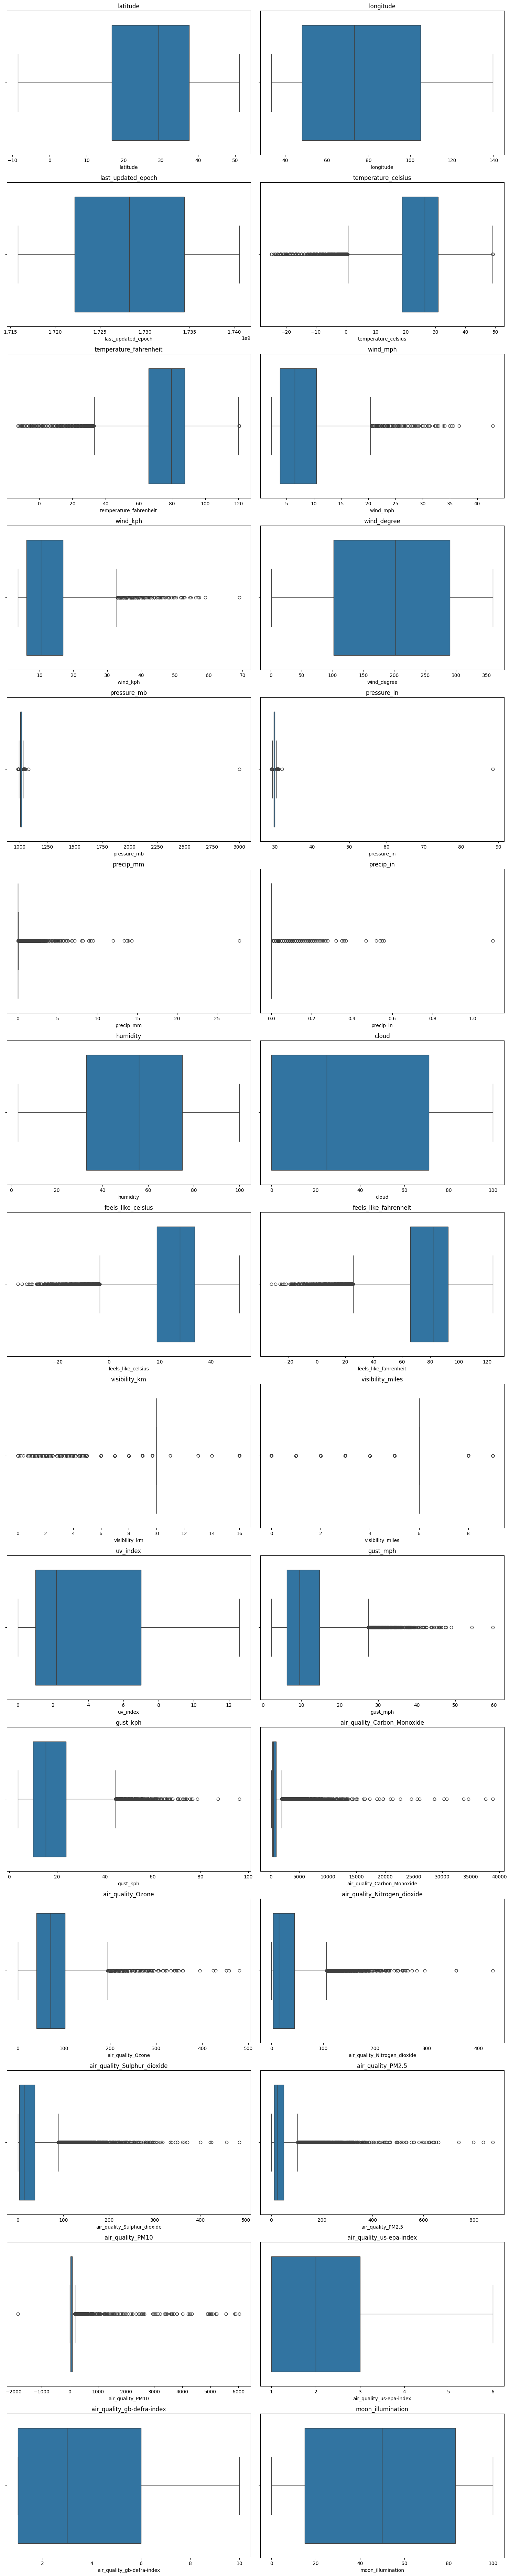

In [15]:
numeric_features = df_asia.select_dtypes(include='number').columns

total_features = len(numeric_features)
n_cols = 2
n_rows = -(-total_features // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df_asia[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df_asia.to_csv('asia_df.csv', index=False)

In [ ]:
df_asia['country'].value_counts

<bound method IndexOpsMixin.value_counts of 0                 Afghanistan
7                     Armenia
10                 Azerbaijan
12                    Bahrain
13                 Bangladesh
                 ...         
55527            Turkmenistan
55531    United Arab Emirates
55535              Uzbekistan
55538                 Vietnam
55539                   Yemen
Name: country, Length: 13650, dtype: object>